# **Generative Ideation with Stable Diffusion**
Copyright 2023, Denis Rothman

Copyright 2023, Denis Rothman

**How to use these automated ideation bonus notebooks**  

You can read these notebooks without running them, or you can:

1.First run *Google_Vertex_Generative_AI_Ideation.ipynb* before running this notebook first to generate prompts. Only the Meme and Langchain prompts will be chained to Stable Diffusion. The other prompts are only examples. The images in this notebook were produced with Microsoft Designer to illustrate a text-to-image process.

The prompts will be sent to this notebook

2.This notebook will retrieve the prompts and generate images with Stable Diffusion.

**Notes:**   
1.Both notebooks were designed to save and retrieve files with Google Drive which requires a free Google Account.

2.This notebook requires a Google Vertex AI account. Check the costs first before running the notebook.

**References**

The [Reference Notebook, copyright 2023 Hugging Face](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb) was modified for educational purposes to implement the generative AI ideation prompts inferred with Vertex AI, PaLM 2 and implementing Langchain in
[Google_Vertex_Generative_AI_Ideation.ipynb](https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/tree/main/Chapter18)

The pipeline in the notebook implements Stable Diffusion with the Hugging Face [Diffusers library](https://github.com/huggingface/diffusers).

# 1.Setup

Select a GPU hardware accelerator: go to the  `Runtime` menu above and make sure a GPUT is selected or  `Change runtime type`.

In [ ]:
!nvidia-smi

Wed Aug  9 09:00:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Next, you should install `diffusers` as well `scipy`, `ftfy` and `transformers`. `accelerate` is used to achieve much faster loading.

In [ ]:
!pip install diffusers==0.11.1 -qq
!pip install transformers scipy ftfy accelerate -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.0 MB/s eta 0:00:00


# 2.Stable Diffusion Pipeline

`StableDiffusionPipeline` is an end-to-end inference pipeline that you can use to generate images from text with just a few lines of code.


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 28 files:   0%|          | 0/28 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Moving the pipeline to GPU to have faster inference.

In [ ]:
pipe = pipe.to("cuda")

In [ ]:
pipe.config

FrozenDict([('vae', ('diffusers', 'AutoencoderKL')),
            ('text_encoder', ('transformers', 'CLIPTextModel')),
            ('tokenizer', ('transformers', 'CLIPTokenizer')),
            ('unet', ('diffusers', 'UNet2DConditionModel')),
            ('scheduler', ('diffusers', 'PNDMScheduler')),
            ('safety_checker',
             ('stable_diffusion', 'StableDiffusionSafetyChecker')),
            ('feature_extractor', ('transformers', 'CLIPImageProcessor')),
            ('requires_safety_checker', True)])

In [ ]:
# An example for one image to test the pipe if necessary
#prompt="A dog with a newspaper in his mouth."
#image=pipe(prompt).images[0]
#image

# 3.Text-to-Image ideation implementation

## Implementing ideation prompts



### Retrieving the ideation outputs

Retrieving Ideation prompts inferred by Google Vertex AI PaLM 2 for text2image meme creation

In [ ]:
# Mounting Google Drive for the entire notebook
# goal: read and write files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


The following code is for Google Drive usage for a project

In [ ]:
!cp "drive/MyDrive/files/image2text.txt" image2text.txt

### Create a text-to-image function

In [ ]:
def text2image(prompt):
  image=pipe(prompt).images[0]
  return image

### Generating images

*Generating images with the prompts  
*Creating 3 variations of the first prompt  
*displaying the images in a grid   



In [ ]:
import re
import PIL.Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid


# Path of the Ideation file containing text prompts
with open("image2text.txt", "r") as f:
    lines = f.readlines()

images = []
for line in lines:
    prompt = line.strip()
    prompt = re.sub(r"\d+\. ", "", prompt)
    img = text2image(prompt)
    images.append(img)

# Add 3 extra images with variations
line1 = lines[0];line1.strip()
img1 = text2image(line1)
img2 = text2image(line1)
img3 = text2image(line1)
images.append(img1)
images.append(img2)
images.append(img3)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/50 [00:00<?, ?it/s]

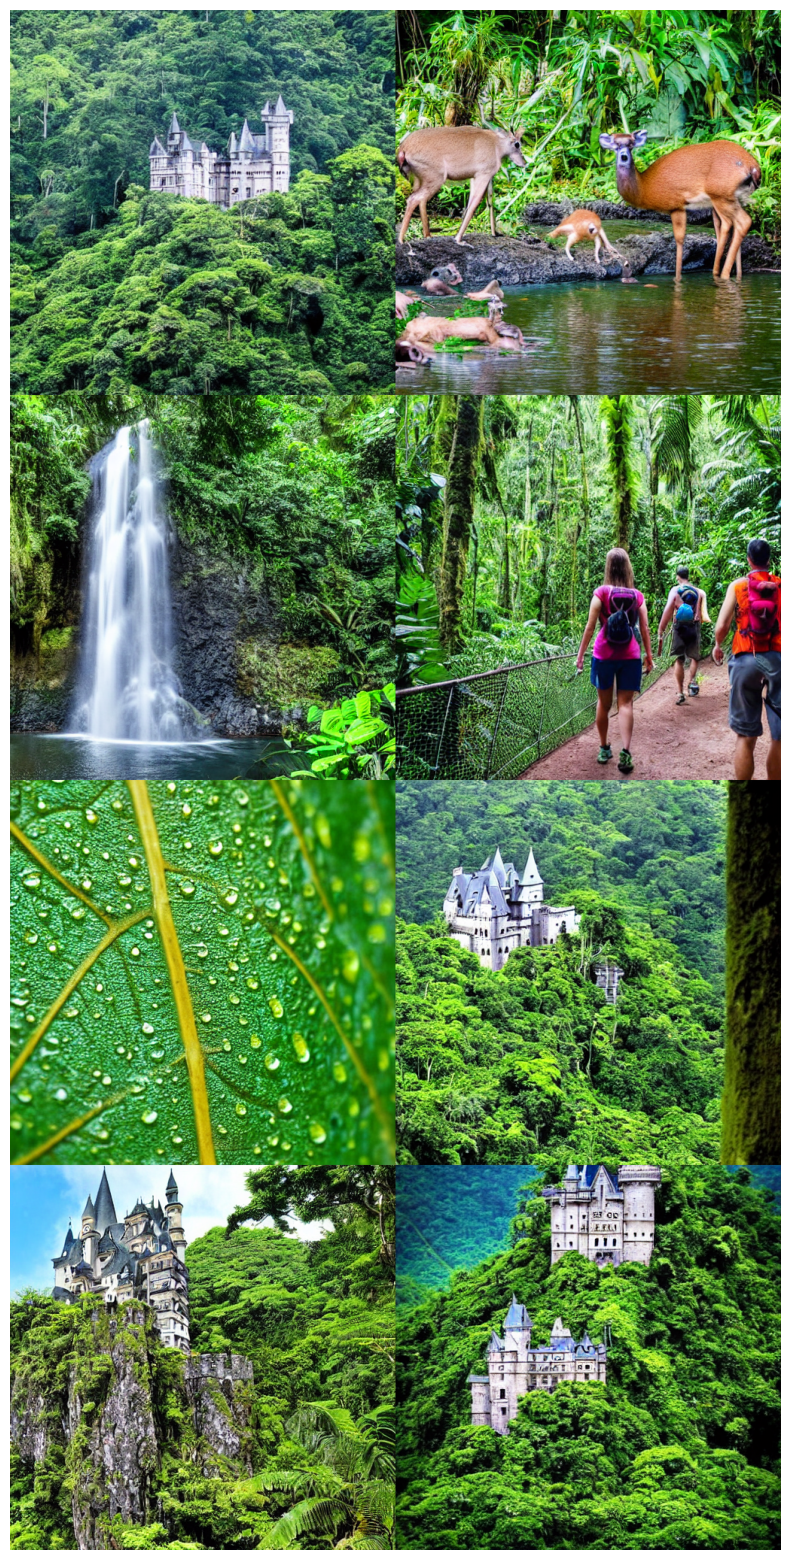

In [ ]:
import matplotlib.pyplot as plt
import math

# Determine rows and cols for the grid
total_images = len(images)
cols = int(math.sqrt(total_images))
rows = total_images // cols + (1 if total_images % cols else 0)

grid = image_grid(images, rows, cols)

# Display the grid using matplotlib
plt.figure(figsize=(20,20))  # Adjust the size as necessary
plt.imshow(grid)
plt.axis('off')  # This will turn off the axis numbers and ticks
plt.show()

Running the code above multiple times will give you a different image every time. If you want deterministic output you can pass a random seed to the pipeline. Every time you use the same seed you'll have the same image result.

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/50 [00:00<?, ?it/s]

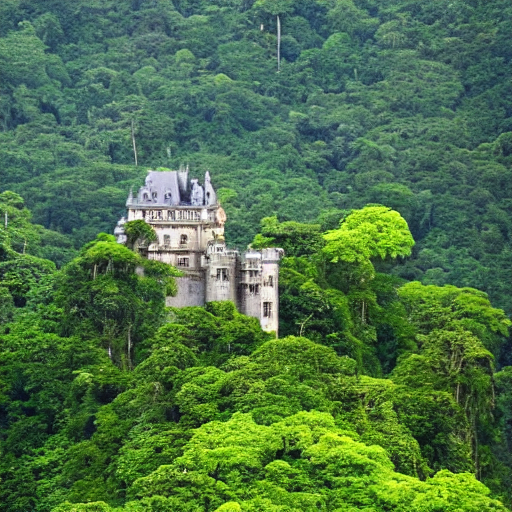

In [ ]:
import torch
generator = torch.Generator("cuda").manual_seed(1024)
prompt = lines[0];prompt.strip()
image = text2image(prompt)
image

You can change the number of inference steps using the `num_inference_steps` argument. In general, results are better the more steps you use. Stable Diffusion, being one of the latest models, works great with a relatively small number of steps, so we recommend to use the default of `50`. If you want faster results you can use a smaller number.

The following cell uses the same seed as before, but with fewer steps. Note how some details, such as the horse's head or the helmet, are less defin realistic and less defined than in the previous image:

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/15 [00:00<?, ?it/s]

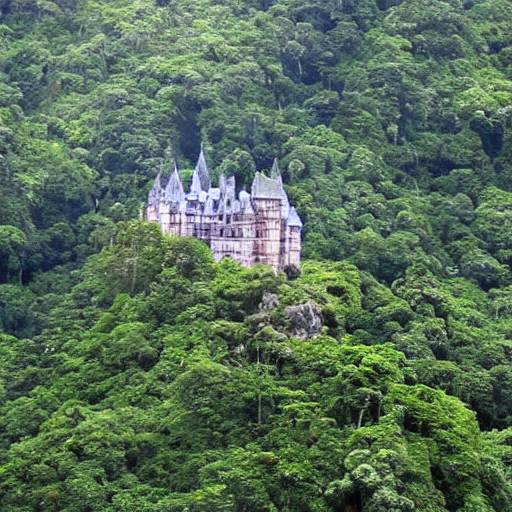

In [ ]:
import torch

generator = torch.Generator("cuda").manual_seed(1024)
prompt = lines[0];prompt.strip()
image = pipe(prompt, num_inference_steps=15, generator=generator).images[0]

image

The other parameter in the pipeline call is `guidance_scale`. It is a way to increase the adherence to the conditional signal which in this case is text as well as overall sample quality. In simple terms classifier free guidance forces the generation to better match with the prompt. Numbers like `7` or `8.5` give good results, if you use a very large number the images might look good, but will be less diverse.

You can learn about the technical details of this parameter in [the last section](https://colab.research.google.com/drive/1ALXuCM5iNnJDNW5vqBm5lCtUQtZJHN2f?authuser=1#scrollTo=UZp-ynZLrS-S) of this notebook.

To generate multiple images for the same prompt, we simply use a list with the same prompt repeated several times. We'll send the list to the pipeline instead of the string we used before.



Let's first write a helper function to display a grid of images. Just run the following cell to create the `image_grid` function, or disclose the code if you are interested in how it's done.

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

### Generate non-square images

Stable Diffusion produces images of `512 × 512` pixels by default. But it's very easy to override the default using the `height` and `width` arguments, so you can create rectangular images in portrait or landscape ratios.

These are some recommendations to choose good image sizes:
- Make sure `height` and `width` are both multiples of `8`.
- Going below 512 might result in lower quality images.
- Going over 512 in both directions will repeat image areas (global coherence is lost).
- The best way to create non-square images is to use `512` in one dimension, and a value larger than that in the other one.

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/50 [00:00<?, ?it/s]

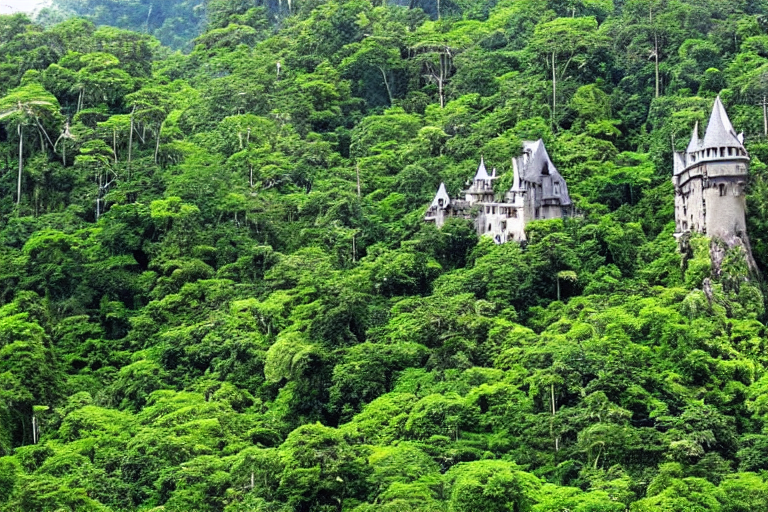

In [ ]:
prompt = lines[0];prompt.strip()
#prompt = "a photograph of an astronaut riding a horse"

image = pipe(prompt, height=512, width=768).images[0]
image

## Text-to-image with Langchain Generative AI output

In [ ]:
!cp "drive/MyDrive/files/Langchain_image2txt.txt" Langchain_image2txt.txt

In [ ]:
# Open the file in read mode and read its contents into a string
with open('Langchain_image2txt.txt', 'r') as file:
    prompt = file.read()

Run the cell several times for different versions.

  0%|          | 0/50 [00:00<?, ?it/s]

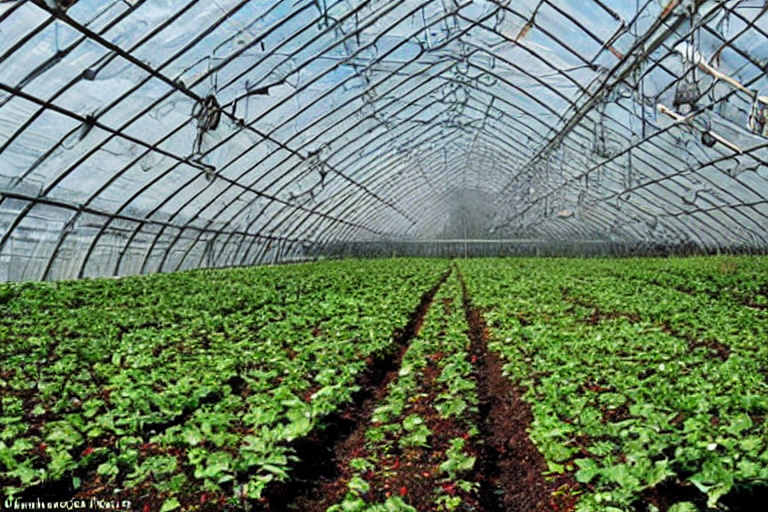

In [ ]:
prompt.strip()
image = pipe(prompt, height=512, width=768).images[0]
image